In [10]:
!pip install mglearn
!pip install koreanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 19.4 MB/s eta 0:00:00


# 선형 분류모델의 결정 경계

In [11]:
import mglearn
import matplotlib.pyplot as plt
import koreanize_matplotlib

from sklearn.linear_model import LogisticRegression # linear model 패키지 안에 존재, 분류할 때 사용할 수 있도록
from sklearn.svm import LinearSVC

import warnings
warnings.filterwarnings('ignore')

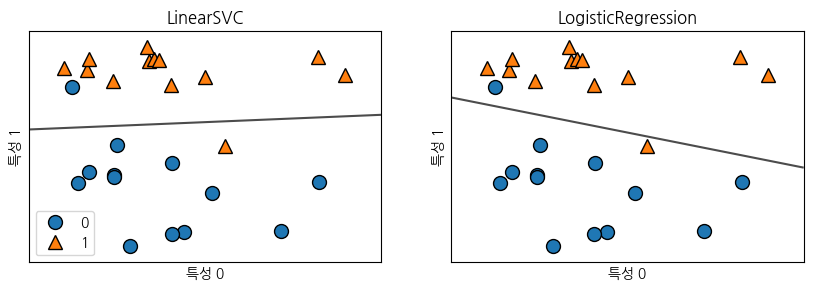

In [ ]:
# 1. mglearn 라이브러리에서 make_forge 함수를 사용하여 데이터셋 생성
# 데이터셋은 X와 y로 구성됨
X, y = mglearn.datasets.make_forge()

# 2. 그래프를 두 개 만듦 (1행 2열로 배치하고, 크기는 10x3)
fig, axes = plt.subplots(1, 2, figsize=(10, 3))

# 3. 두 개의 분류 모델(LinearSVC와 LogisticRegression)을 순차적으로 학습하고, 시각화
for model, ax in zip([LinearSVC(max_iter=5000), LogisticRegression()], axes):
  # 4. 모델을 X와 y를 사용하여 학습
    clf = model.fit(X, y)
    # 5. 학습된 모델을 사용하여 결정 경계를 그래프에 그림
    # 결정 경계를 그리기 위해 mglearn.plots.plot_2d_separator() 함수 사용
    # 결정 경계는 선으로 표현되며, 분류를 수행하는데 사용됨
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
                                    ax=ax, alpha=.7)
     # 6. 데이터를 산점도로 그래프에 표시
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
# 첫 번째 그래프에 범례(legend)를 추가
axes[0].legend()
plt.show() # 선을 사용하여 결정경계 -> 분류 용이

## LogisticRegression 규제(L2)에 따른 결정경계 확인

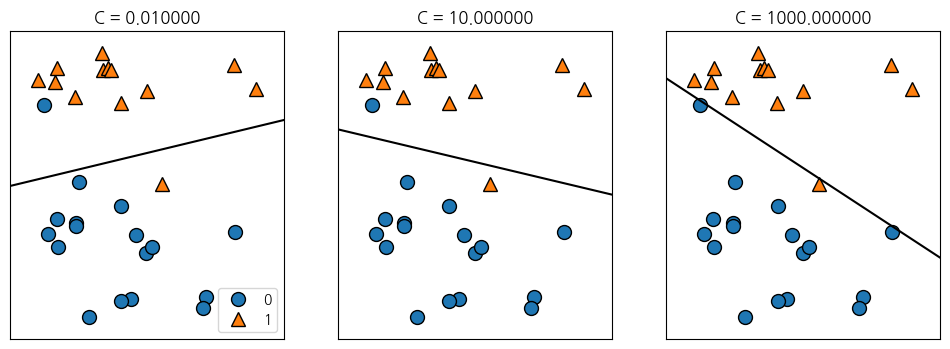

In [ ]:
# C=1 규제(공부를 덜 시키겠다 -> 과대적합을 피하겠다) 설정 값
# C 설정 값이 낮으면 ex) 0.01, 0.001 -> 규제 강화 -> 일반화 -> 과소적합
# C 설정 값이 높으면 ex) 10, 100, 1000 -> 규제 완화 -> 과대적합
# C 규제는 alpha 와 반대로 조
# L2 규제 -> feature 모두 사용
mglearn.plots.plot_linear_svc_regularization()

## 유방암 데이터셋을 사용한 로지스틱 회귀 성능평가


*   규제 강도를 결정하는 C 설정에 따른 성능 비교
*   기본 C = 1 (규제를 하고 시작함 - > default)
*   C = 0.01 -> 규제 강화
*   C = 100 -> 규제 완화



### 데이터 준비하기

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# 데이터 가져오기
cancer = load_breast_cancer()

# 성능 평가를 위한 데이터셋 분리하기
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    stratify=cancer.target, # 비율 보정 (타겟의 비율 보정) -> 한쪽으로 치우치면 안되니까 !
                                                    random_state = 7) # 75 : 25 비율로 나눔



In [ ]:
# 560건 -> 75% -> 426건
X_train.shape

(426, 30)

In [ ]:
# 560건 -> 25% -> 143건
X_test.shape # 비율 확인

(143, 30)

### 모델 설정하기

In [3]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression() # C = 1 (default)

### 모델 학습하기

In [4]:
logreg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [5]:
print('훈련 데이터셋의 R2: ', logreg.score(X_train, y_train))
print('테스트 데이터셋의 R2: ', logreg.score(X_test, y_test))

훈련 데이터셋의 R2:  0.960093896713615
테스트 데이터셋의 R2:  0.9440559440559441


### 기본 C = 1, 규제 강화 C = 0.01, 규제 완화 C = 100 성능평가

In [6]:
logreg = LogisticRegression().fit(X_train, y_train)
print('훈련 데이터셋의 R2: ', logreg.score(X_train, y_train))
print('테스트 데이터셋의 R2: ', logreg.score(X_test, y_test))
print('---------------------------------------------------------')
# 규제 강화
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print('훈련 데이터셋의 R2: ', logreg001.score(X_train, y_train))
print('테스트 데이터셋의 R2: ', logreg001.score(X_test, y_test))
print('---------------------------------------------------------')
# 규제 완화
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print('훈련 데이터셋의 R2: ', logreg100.score(X_train, y_train))
print('테스트 데이터셋의 R2: ', logreg100.score(X_test, y_test))
print('---------------------------------------------------------')


훈련 데이터셋의 R2:  0.960093896713615
테스트 데이터셋의 R2:  0.9440559440559441
---------------------------------------------------------
훈련 데이터셋의 R2:  0.9295774647887324
테스트 데이터셋의 R2:  0.9440559440559441
---------------------------------------------------------
훈련 데이터셋의 R2:  0.9436619718309859
테스트 데이터셋의 R2:  0.9440559440559441
---------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

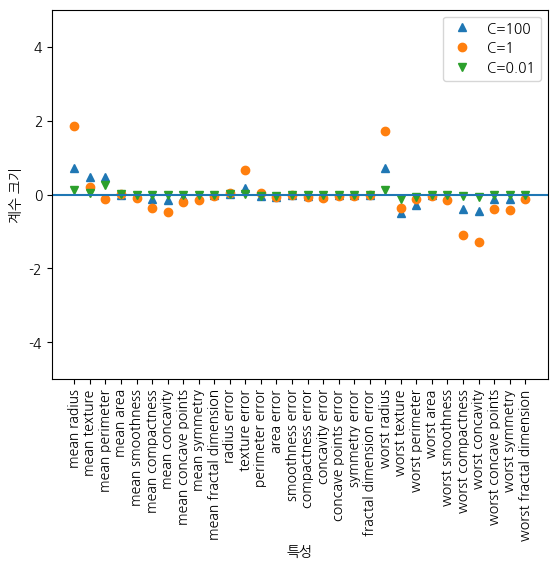

In [12]:
# L2 규제에 대한 feature들의 가중치를 확인

plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg001.coef_.T, 'v', label="C=0.01")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5, 5)
plt.xlabel("특성")
plt.ylabel("계수 크기")
plt.legend()
plt.show()

### L1규제에 따른 성능평가

In [ ]:
logreg = LogisticRegression(penalty='l1', solver='liblinear').fit(X_train, y_train)
print('훈련 데이터셋의 R2: ', logreg.score(X_train, y_train))
print('테스트 데이터셋의 R2: ', logreg.score(X_test, y_test))
print('---------------------------------------------------------')
# 규제 강화
logreg001 = LogisticRegression(C=0.01, penalty='l1', solver='liblinear').fit(X_train, y_train)
print('훈련 데이터셋의 R2: ', logreg001.score(X_train, y_train))
print('테스트 데이터셋의 R2: ', logreg001.score(X_test, y_test))
print('---------------------------------------------------------')
# 규제 완화
logreg100 = LogisticRegression(C=100, penalty='l1', solver='liblinear').fit(X_train, y_train)
print('훈련 데이터셋의 R2: ', logreg100.score(X_train, y_train))
print('테스트 데이터셋의 R2: ', logreg100.score(X_test, y_test))
print('---------------------------------------------------------')


훈련 데이터셋의 R2:  0.960093896713615
테스트 데이터셋의 R2:  0.9440559440559441
---------------------------------------------------------
훈련 데이터셋의 R2:  0.9154929577464789
테스트 데이터셋의 R2:  0.916083916083916
---------------------------------------------------------
훈련 데이터셋의 R2:  0.9859154929577465
테스트 데이터셋의 R2:  0.958041958041958
---------------------------------------------------------


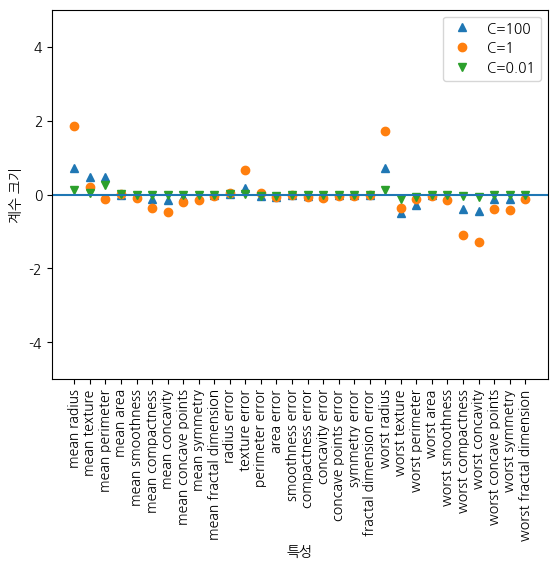

In [13]:
# L1 규제에 대한 feature selection 확인

plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg001.coef_.T, 'v', label="C=0.01")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5, 5)
plt.xlabel("특성")
plt.ylabel("계수 크기")
plt.legend()
plt.show()